## Loading in both data files

1. All posts data

In [48]:
import pandas as pd

In [49]:
df=pd.read_csv('QueryCleaned.csv')

In [50]:
df.head()

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ClosedDate,ContentLicense
0,71911980,1,-1.0,2022-04-18 12:44:51,0,368,"<p>Everything in my code is working well, unti...",6542807.0,6542807.0,2022-04-18 17:16:12,2022-04-18 17:16:12,ValueError on KNN in Python,<python><data-science><knn>,0,6,NaN,CC BY-SA 4.0
1,71482445,1,-1.0,2022-03-15 12:42:56,0,512,<p>For example:</p>\n<h2>dataframe A</h2>\n<di...,18472617.0,9840637.0,2022-03-15 12:51:33,2022-03-15 16:10:09,How to multiply two pyspark dataframes element...,<python><pyspark><data-science>,2,2,NaN,CC BY-SA 4.0
2,73047143,1,-1.0,2022-07-20 06:53:51,1,45,<p>My requirement is that I have an xlsx workb...,19452662.0,19230181.0,2022-07-20 07:07:46,2022-07-20 07:07:46,How to pass data from an xlsx to another code ...,<python><excel><data-science>,0,1,NaN,CC BY-SA 4.0
3,72243463,1,-1.0,2022-05-14 19:55:19,0,251,<p>I have two datasets that are collected at d...,8753176.0,-1.0,NaN,2022-09-16 21:15:32,how to align sliding window to extract feature...,<python><machine-learning><statistics><data-sc...,1,1,NaN,CC BY-SA 4.0
4,72243721,1,72244080.0,2022-05-14 20:41:51,0,26,<p>I am learning pandas and Data Science and a...,9918947.0,11865956.0,2022-05-14 20:48:32,2022-05-14 21:46:21,How to get this single column data into data f...,<python><pandas><dataframe><data-science>,1,0,NaN,CC BY-SA 4.0


2. Inverted index data

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1475 non-null   int64  
 1   PostTypeId        1475 non-null   int64  
 2   AcceptedAnswerId  1475 non-null   float64
 3   CreationDate      1475 non-null   object 
 4   Score             1475 non-null   int64  
 5   ViewCount         1475 non-null   int64  
 6   Body              1475 non-null   object 
 7   OwnerUserId       1475 non-null   float64
 8   LastEditorUserId  1475 non-null   float64
 9   LastEditDate      757 non-null    object 
 10  LastActivityDate  1475 non-null   object 
 11  Title             1475 non-null   object 
 12  Tags              1475 non-null   object 
 13  AnswerCount       1475 non-null   int64  
 14  CommentCount      1475 non-null   int64  
 15  ClosedDate        79 non-null     object 
 16  ContentLicense    1475 non-null   object 


In [52]:
df['LastEditDate'].fillna("N/A", inplace=True)

In [53]:
df['ClosedDate'].fillna("N/A", inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1475 non-null   int64  
 1   PostTypeId        1475 non-null   int64  
 2   AcceptedAnswerId  1475 non-null   float64
 3   CreationDate      1475 non-null   object 
 4   Score             1475 non-null   int64  
 5   ViewCount         1475 non-null   int64  
 6   Body              1475 non-null   object 
 7   OwnerUserId       1475 non-null   float64
 8   LastEditorUserId  1475 non-null   float64
 9   LastEditDate      1475 non-null   object 
 10  LastActivityDate  1475 non-null   object 
 11  Title             1475 non-null   object 
 12  Tags              1475 non-null   object 
 13  AnswerCount       1475 non-null   int64  
 14  CommentCount      1475 non-null   int64  
 15  ClosedDate        1475 non-null   object 
 16  ContentLicense    1475 non-null   object 


In [55]:
inv_df1 = pd.read_csv('Inverted_index.txt\part-00000', sep=',', header=None)
inv_df2 = pd.read_csv('Inverted_index.txt\part-00001', sep=',', header=None)
inv_df=pd.concat([inv_df1, inv_df2])

In [56]:
inv_df.head()

,0,1
0,('python','71911980 71482445 73047143 72243463 72243721...
1,('data-science','71911980 71482445 73047143 72243463 72243721...
2,('machine-learning','72243463 72261434 72268164 72269625 72286029...
3,('pandas','72243721 72251266 72252860 72252897 72259212...
4,('moving-average',72251266)


### Getting everything in the right format

In [57]:
inv_df.columns = ['Tag','Ids']

In [58]:
inv_df.head()

,Tag,Ids
0,('python','71911980 71482445 73047143 72243463 72243721...
1,('data-science','71911980 71482445 73047143 72243463 72243721...
2,('machine-learning','72243463 72261434 72268164 72269625 72286029...
3,('pandas','72243721 72251266 72252860 72252897 72259212...
4,('moving-average',72251266)


In [59]:
def func1(text):
    text=text[2:-1]
    return text

In [60]:
inv_df['Tag']=inv_df['Tag'].apply(func1)

In [61]:
def func2(text):
    text=text[2:-2]
    return text

In [62]:
inv_df['Ids']=inv_df['Ids'].apply(func2)

In [63]:
inv_df.head()

,Tag,Ids
0,python,71911980 71482445 73047143 72243463 72243721 7...
1,data-science,71911980 71482445 73047143 72243463 72243721 7...
2,machine-learning,72243463 72261434 72268164 72269625 72286029 7...
3,pandas,72243721 72251266 72252860 72252897 72259212 7...
4,moving-average,225126


Checking if the Ids column has been converted to the desired format..

In [64]:
inv_df.iloc[8].Ids

'72259217 74062433 74207648 71052648 71111019 71993019 72055788 73857858 72932768 72996550 73023075'

In [65]:
def func3(text):
    l = text.split()
    l = list(map(int, l))
    return l

In [66]:
inv_df['Ids']=inv_df['Ids'].apply(func3)

In [67]:
inv_df.head()

,Tag,Ids
0,python,"[71911980, 71482445, 73047143, 72243463, 72243..."
1,data-science,"[71911980, 71482445, 73047143, 72243463, 72243..."
2,machine-learning,"[72243463, 72261434, 72268164, 72269625, 72286..."
3,pandas,"[72243721, 72251266, 72252860, 72252897, 72259..."
4,moving-average,[225126]


In [68]:
inv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 0 to 334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tag     687 non-null    object
 1   Ids     687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [69]:
inv_df.drop(inv_df.loc[inv_df['Tag']=='data-science'].index, inplace=True)

In [70]:
inv_df=inv_df.reset_index()

In [71]:
inv_df=inv_df.drop('index',axis=1)

In [72]:
inv_df.head()

,Tag,Ids
0,python,"[71911980, 71482445, 73047143, 72243463, 72243..."
1,machine-learning,"[72243463, 72261434, 72268164, 72269625, 72286..."
2,pandas,"[72243721, 72251266, 72252860, 72252897, 72259..."
3,moving-average,[225126]
4,data-science-experience,"[72251266, 72483747, 72502563, 72490941, 72706..."


In [73]:
inv_df.to_csv("inverted_index.csv",index=False)

## EDA

### 1. Top Topics

In [74]:
df_expanded = inv_df.explode('Ids')

In [75]:
df_expanded.head()

,Tag,Ids
0,python,71911980
0,python,71482445
0,python,73047143
0,python,72243463
0,python,72243721


In [76]:
import matplotlib.pyplot as plt

In [77]:
tag_counts = df_expanded['Tag'].value_counts()

In [78]:
tag_counts

Tag
python                  1007
pandas                   521
dataframe                323
machine-learning         236
r                        103
                        ... 
quantitative-finance       1
image-quality              1
plotly-express             1
conversational-ai          1
supervised-learning        1
Name: count, Length: 685, dtype: int64

In [79]:
top_10_tags = tag_counts.head(10)

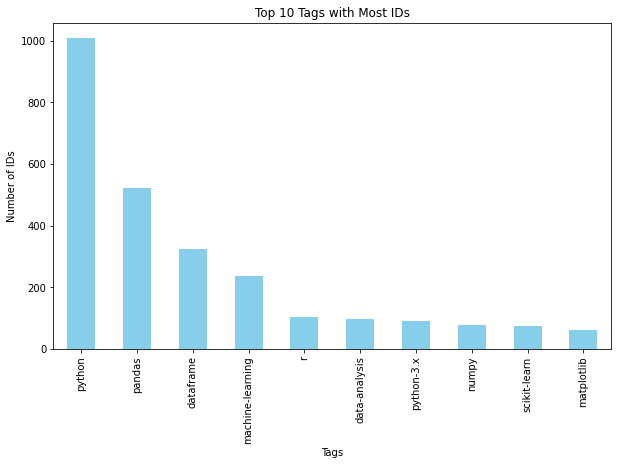

In [80]:
top_10_tags.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Tags with Most IDs')
plt.xlabel('Tags')
plt.ylabel('Number of IDs')
plt.show()


### 1. Top 5 topics for each month

In [81]:
tuple1 = pd.read_csv('WordTuple.txt\part-00000', sep=',', header=None)
tuple2 = pd.read_csv('WordTuple.txt\part-00001', sep=',', header=None)
tupdf=pd.concat([tuple1, tuple2])

In [82]:
tupdf.head()

,0,1
0,('python',71911980)
1,('data-science',71911980)
2,('knn',71911980)
3,('python',71482445)
4,('pyspark',71482445)


In [83]:
tupdf.columns=['Tag','ID']

In [84]:
tupdf.head()

,Tag,ID
0,('python',71911980)
1,('data-science',71911980)
2,('knn',71911980)
3,('python',71482445)
4,('pyspark',71482445)


In [85]:
tupdf['Tag']=tupdf['Tag'].apply(func1)

In [86]:
tupdf['ID']=tupdf['ID'].apply(lambda x:x[0:-1])

In [87]:
tupdf['ID']=tupdf['ID'].apply(lambda x:int(x))

In [88]:
tupdf.head()

,Tag,ID
0,python,71911980
1,data-science,71911980
2,knn,71911980
3,python,71482445
4,pyspark,71482445


In [89]:
tupdf = tupdf.drop(tupdf[tupdf['Tag'] == 'data-science'].index)

In [90]:
tupdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3575 entries, 0 to 3040
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tag     3575 non-null   object
 1   ID      3575 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 83.8+ KB


In [91]:
extdf = tupdf.merge(df[['Id','CreationDate']], how = 'left',
                left_on = 'ID', right_on = 'Id').drop(columns = ['Id'])

In [92]:
extdf.head()

,Tag,ID,CreationDate
0,python,71911980,2022-04-18 12:44:51
1,python,71482445,2022-03-15 12:42:56
2,pyspark,71482445,2022-03-15 12:42:56
3,excel,73047143,2022-07-20 06:53:51
4,machine-learning,72243463,2022-05-14 19:55:19


In [93]:
extdf['CreationDate'] = pd.to_datetime(extdf['CreationDate'])

In [94]:
extdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tag           3575 non-null   object        
 1   ID            3575 non-null   int64         
 2   CreationDate  3575 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 83.9+ KB


In [95]:
extdf.head()

,Tag,ID,CreationDate
0,python,71911980,2022-04-18 12:44:51
1,python,71482445,2022-03-15 12:42:56
2,pyspark,71482445,2022-03-15 12:42:56
3,excel,73047143,2022-07-20 06:53:51
4,machine-learning,72243463,2022-05-14 19:55:19


In [96]:
# Extract month from 'CreationDate'
extdf['Month'] = extdf['CreationDate'].dt.month

In [97]:
# Group by month and tag, count occurrences, and select the top 5 tags for each month
top_tags_by_month = (extdf.groupby(['Month', 'Tag'])
                     .size()
                     .reset_index(name='TagCount')
                     .groupby('Month')
                     .apply(lambda x: x.nlargest(5, 'TagCount'))
                     .reset_index(drop=True))

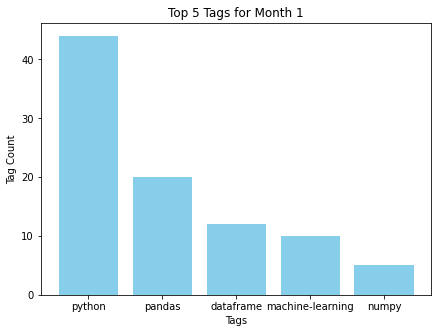

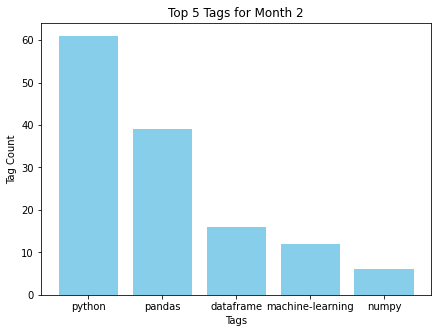

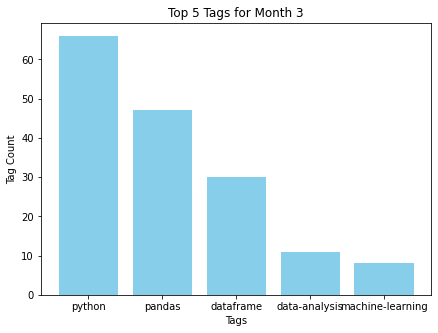

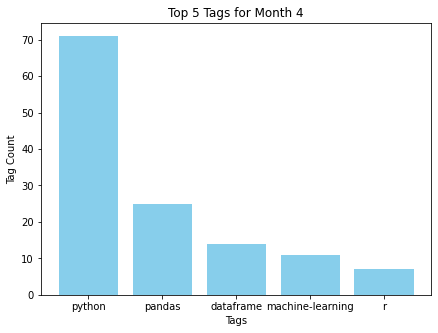

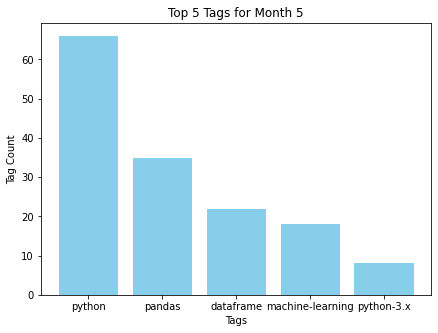

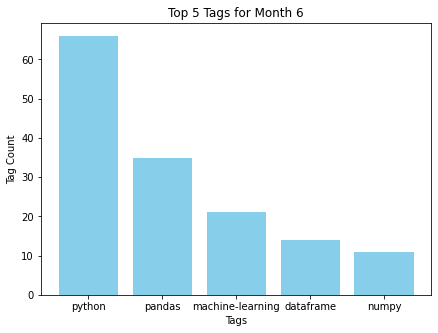

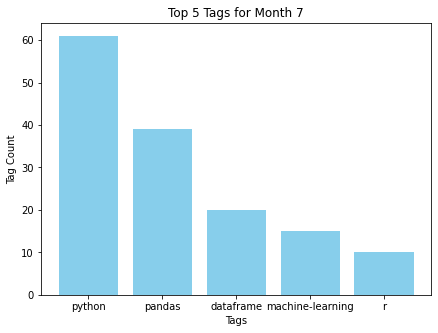

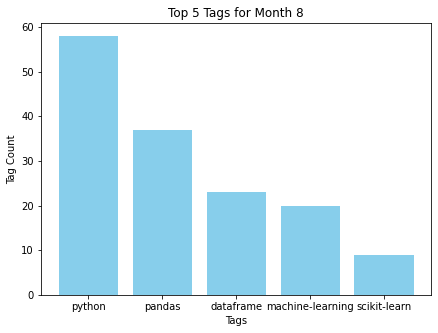

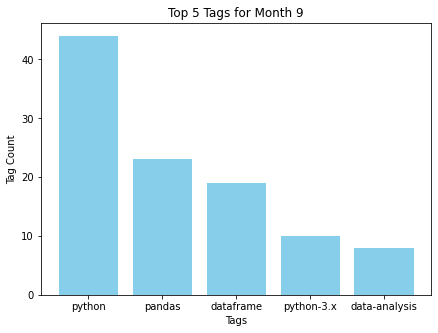

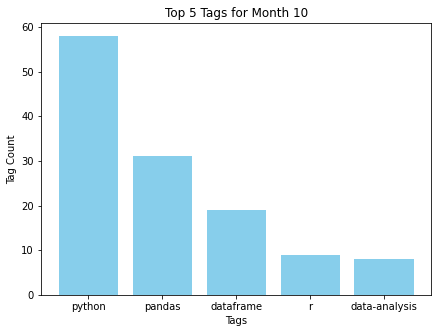

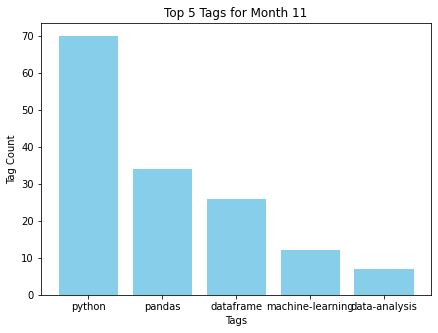

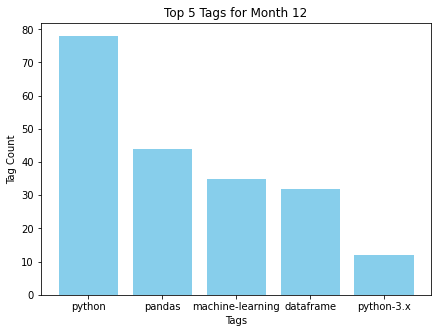

In [98]:
for month, group in top_tags_by_month.groupby('Month'):
    plt.figure(figsize=(7, 5))
    plt.bar(group['Tag'], group['TagCount'], color='skyblue')
    plt.title(f'Top 5 Tags for Month {month}')
    plt.xlabel('Tags')
    plt.ylabel('Tag Count')
    plt.show()
